## EDA ASSIGNMENT : BIKE SHARING SYSTEM

#### PROBLEM STATEMENT :
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
 
Essentially the company wants:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

### Step 1: Importing Libraries

In [703]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [704]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [705]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Reading and Understanding the data

In [706]:
#Read the data from csv file
Bike_Sharing_df=pd.read_csv('day.csv')

In [707]:
#Check the head of the dataframe
Bike_Sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [708]:
#Check the tail of the dataframe
Bike_Sharing_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [709]:
#Checking the number of rows and columns
print("Number of rows and columns:",Bike_Sharing_df.shape)

Number of rows and columns: (730, 16)


In [710]:
#Describing all the columns of the dataframe
Bike_Sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [711]:
#Print info about columns to check missing values and datatype
Bike_Sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### As you can see the total number of rows in the dataframe is 730, and the count of all the rows in individual column is also 730 i.e there are no null values to deal with.

### Step 3: Data Preparation

##### Dropping the unwanted columnss
1. The "instant" column is just for counting rows, while you can figure out the date from the "year" and "month" columns instead of using "dteday."
2. "Casual" and "registered" seem to show how the total count in the "cnt" column is divided into different categories.

In [712]:
#Dropping all 4 columns; instant, dteday, casual and registered
Bike_Sharing_df.drop(['instant', 'dteday', 'casual' , 'registered'], axis =1 ,inplace=True)

In [713]:
#Checking if the columns got dropped from the dataframe
Bike_Sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Handling Outliers

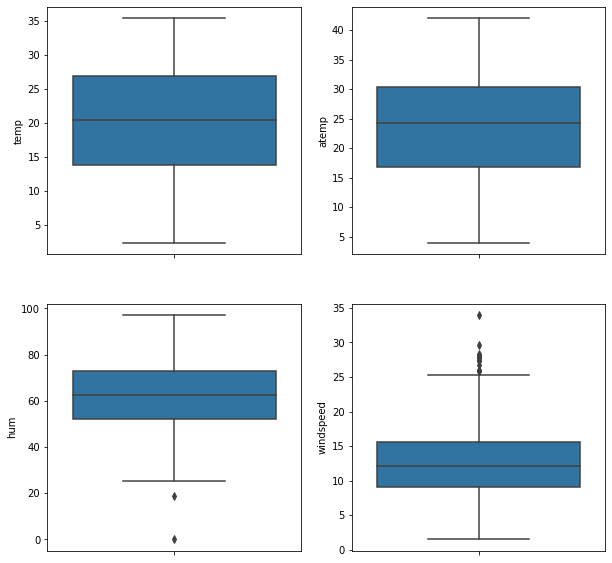

In [714]:
#Plotting boxplots for continuous variables to check outliers
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y='temp',data=Bike_Sharing_df)
plt.subplot(2,2,2)
sns.boxplot(y='atemp',data=Bike_Sharing_df)
plt.subplot(2,2,3)
sns.boxplot(y='hum',data=Bike_Sharing_df)
plt.subplot(2,2,4)
sns.boxplot(y='windspeed',data=Bike_Sharing_df)
plt.show()

#### There are no significant outliers to be handled necessarily.

#### Converting values of column [season,yr,mnth,weekday,weathersit]


In [715]:
#mapping the season column
Bike_Sharing_df['season']=Bike_Sharing_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [716]:
#mapping the mnth column
Bike_Sharing_df['mnth']=Bike_Sharing_df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [717]:
#mapping the weekday column
Bike_Sharing_df['weekday']=Bike_Sharing_df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [718]:
#mapping the weathersit column
Bike_Sharing_df['weathersit']=Bike_Sharing_df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [719]:
Bike_Sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 4: Visualising the data

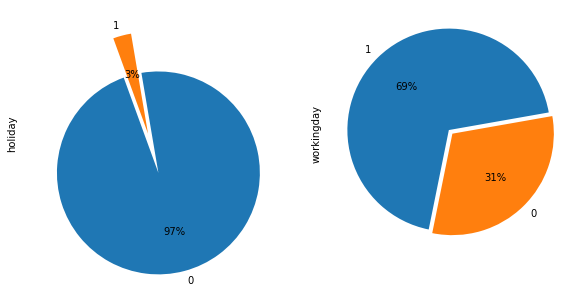

In [804]:
# Creating pie chart for yr,holiday and workingday
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
Bike_Sharing_df['holiday'].value_counts(normalize=True).plot.pie(explode=(0.4,0),autopct='%1.0f%%',startangle=110)
plt.subplot(1,2,2)
Bike_Sharing_df['workingday'].value_counts(normalize=True).plot.pie(explode=(0.05,0),autopct='%1.0f%%',startangle=10)
plt.show()

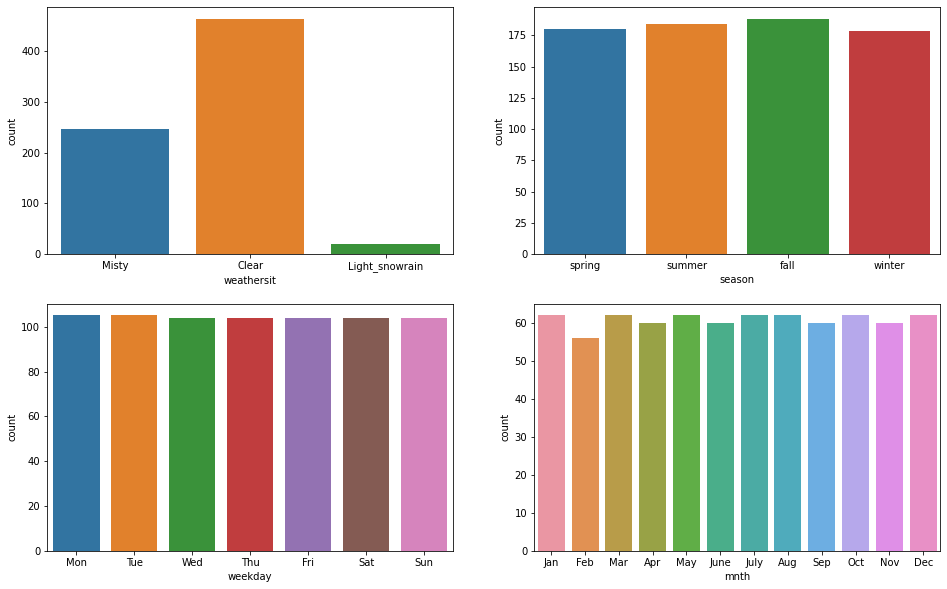

In [801]:
#Creating countplot for weathersit, season, weekday and mnth
plt.figure(figsize=[16,10])
plt.subplot(2,2,1)
sns.countplot(data=Bike_Sharing_df,x='weathersit')
plt.subplot(2,2,2)
sns.countplot(data=Bike_Sharing_df,x='season')
plt.subplot(2,2,3)
sns.countplot(data=Bike_Sharing_df,x='weekday')
plt.subplot(2,2,4)
sns.countplot(data=Bike_Sharing_df,x='mnth')
plt.show()

##### Conclusion: When weathersit is clear, the demand for rental bikes are high.

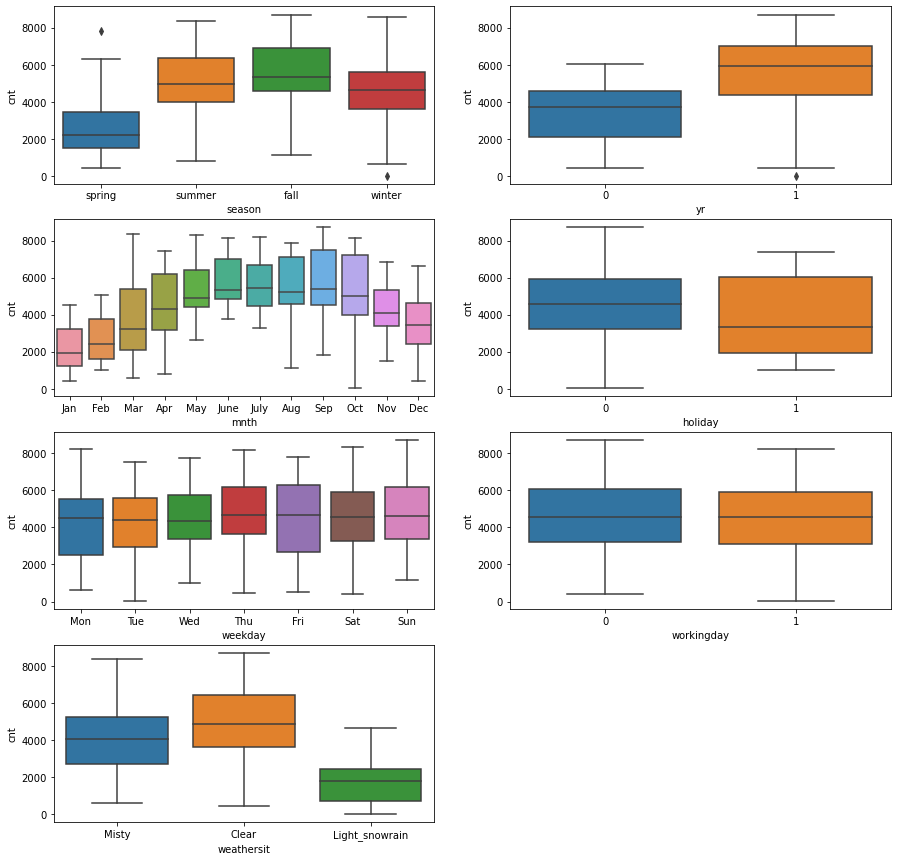

In [720]:
#Plotting the boxplot for each categorical column against target value 
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=Bike_Sharing_df)
plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=Bike_Sharing_df)
plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt',data=Bike_Sharing_df)
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=Bike_Sharing_df)
plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=Bike_Sharing_df)
plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt',data=Bike_Sharing_df)
plt.subplot(4,2,7)
sns.boxplot(x='weathersit',y='cnt',data=Bike_Sharing_df)
plt.show()

### Conclusions:
1. Season: Fall has the highest demand for rental bikes followed by summer. Spring is the season where people least rent bikes.
2. yr: The demand for rental bikes has significantly increased in 2019.
3. mnth: First the demand for bikes kept increasing month after month. Sept has the most count for renting bikes. After that there is a decrease in demand.
4. holiday: When there is a holiday , the demand has increased.
5. weekday: Sunday has more demand for rental bikes as compared to other even though the weekday is not giving a clear picture for demand.
6. weathersit: The clear weather has highest demand. 

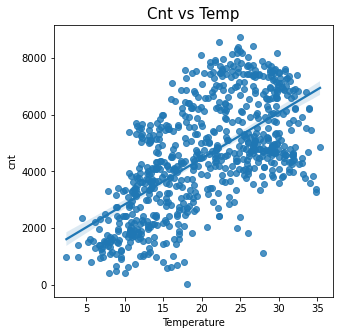

In [721]:
# Creating regplot for cnt vs Temp
plt.figure(figsize=(5,5))
plt.title('Cnt vs Temp',fontsize=15)
sns.regplot(data=Bike_Sharing_df,y='cnt',x='temp')
plt.xlabel("Temperature")
plt.show()

#### Conclusion: 
1. cnt is increasing with temp also indicating linear relationship. 
2. Demand is positively correlated to temp. The data are scattered near the regression line.

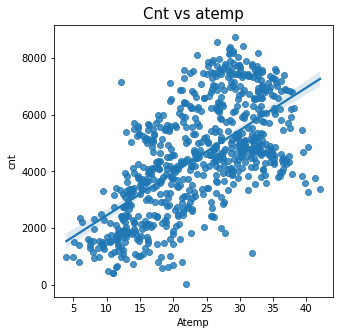

In [722]:
# Creating regplot for cnt vs atemp
plt.figure(figsize=(5,5))
plt.title('Cnt vs atemp',fontsize=15)
sns.regplot(data=Bike_Sharing_df,y='cnt',x='atemp')
plt.xlabel("Atemp")
plt.show()

#### Conclusion: 
1. cnt is increasing with atemp also indicating linear relationship. 
2. Demand is positively correlated to atemp. The data are scattered near the regression line.

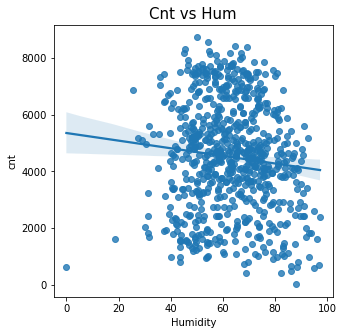

In [723]:
# Creating regplot for cnt vs hum
plt.figure(figsize=(5,5))
plt.title('Cnt vs Hum',fontsize=15)
sns.regplot(data=Bike_Sharing_df,y='cnt',x='hum')
plt.xlabel('Humidity')
plt.show()

#### Conclusion: 
1. cnt is decreasing as humidity is increasing. 
2. The data points are scattered away from the regression line.

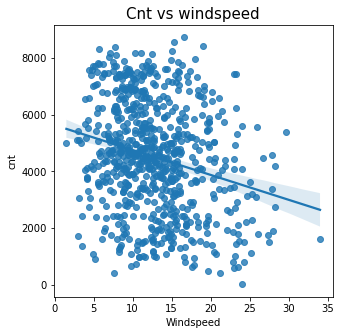

In [724]:
# Creating regplot for cnt vs windspeed
plt.figure(figsize=(5,5))
plt.title('Cnt vs windspeed',fontsize=15)
sns.regplot(data=Bike_Sharing_df,y='cnt',x='windspeed')
plt.xlabel("Windspeed")
plt.show()

#### Conclusion: 
1. cnt is decreasing as windspeed is increasing. 
2. The data points are scattered away from the regression line.

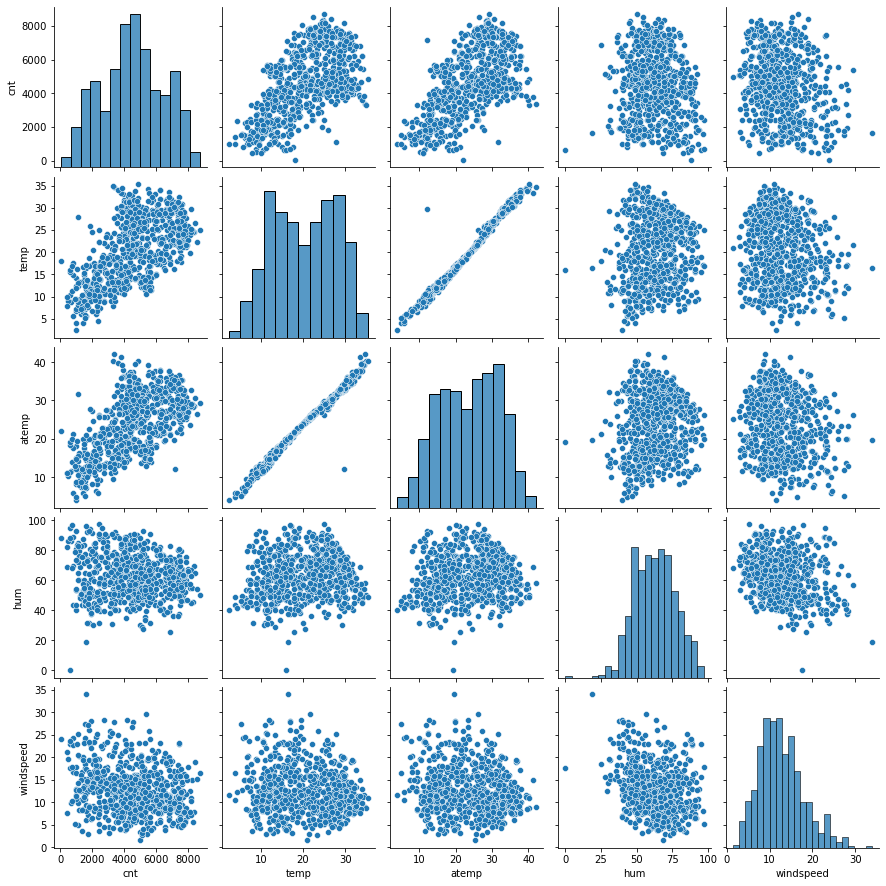

In [807]:
#Plotting pairplot for 'cnt', 'temp', 'atemp', 'hum','windspeed'
sns.pairplot(data=Bike_Sharing_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

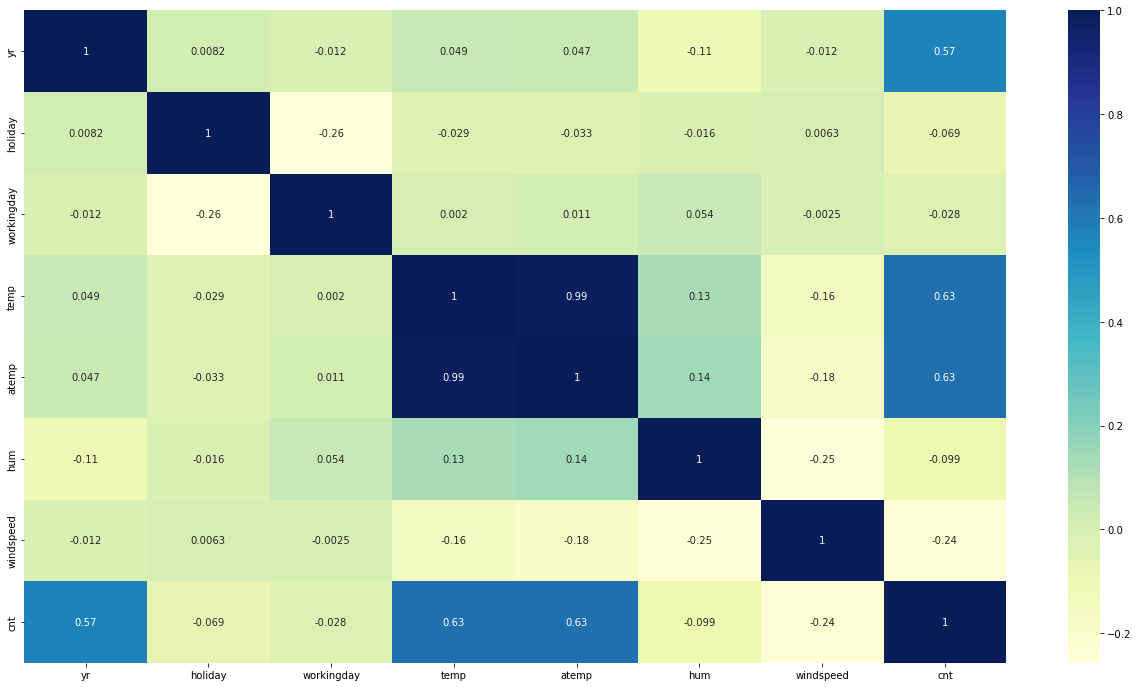

In [725]:
# Plotting heatmap to check the multicollinearity among variables
corr= Bike_Sharing_df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

### Conclusion: Both temp and atemp are highly correlated. So, only one variable can be used due to multicollinearity. And temp and atemp are highly and equally correlated to cnt as well.

### Step 5: Data preparation

In [726]:
# Creating dummy variables for mnth,weekday, weathersit and season as the number of values in each column is more than 2.
month_dv=pd.get_dummies(Bike_Sharing_df.mnth,drop_first=True)
weekday_dv=pd.get_dummies(Bike_Sharing_df.weekday,drop_first=True)
weathersit_dv=pd.get_dummies(Bike_Sharing_df.weathersit,drop_first=True)
season_dv=pd.get_dummies(Bike_Sharing_df.season,drop_first=True)

In [727]:
Bike_Sharing_new= pd.concat([Bike_Sharing_df,month_dv,weekday_dv,weathersit_dv,season_dv],axis=1)
Bike_Sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [728]:
#info of new dataframe
Bike_Sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  July            730 non-null    uint8  
 17  June            730 non-null    uin

In [729]:
#Dropping mnth,weekday, weathersit and season as we have already created dummy variables for these columns
Bike_Sharing_new.drop(['mnth','weekday', 'weathersit','season'],axis=1,inplace=True)

In [730]:
Bike_Sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    uint8  
 9   Dec             730 non-null    uint8  
 10  Feb             730 non-null    uint8  
 11  Jan             730 non-null    uint8  
 12  July            730 non-null    uint8  
 13  June            730 non-null    uint8  
 14  Mar             730 non-null    uint8  
 15  May             730 non-null    uint8  
 16  Nov             730 non-null    uint8  
 17  Oct             730 non-null    uin

### Step 6: Splitting the data into Training and Test sets

In [731]:
#Splitting the data into Train and Test Sets
np.random.seed(0)
df_train,df_test=train_test_split(Bike_Sharing_new,train_size=0.7,test_size=0.3,random_state=100)

In [732]:
#Checking the number of rows and columns of train and test set
print("Number of rows and columns:",df_train.shape)
print("Number of rows and columns:",df_test.shape)

Number of rows and columns: (510, 30)
Number of rows and columns: (219, 30)


In [733]:
Bike_Sharing_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


### Scaling the continous variables

In [734]:
#Using MinMax Scaler to rescale the features
scaler=MinMaxScaler()
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [735]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [736]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


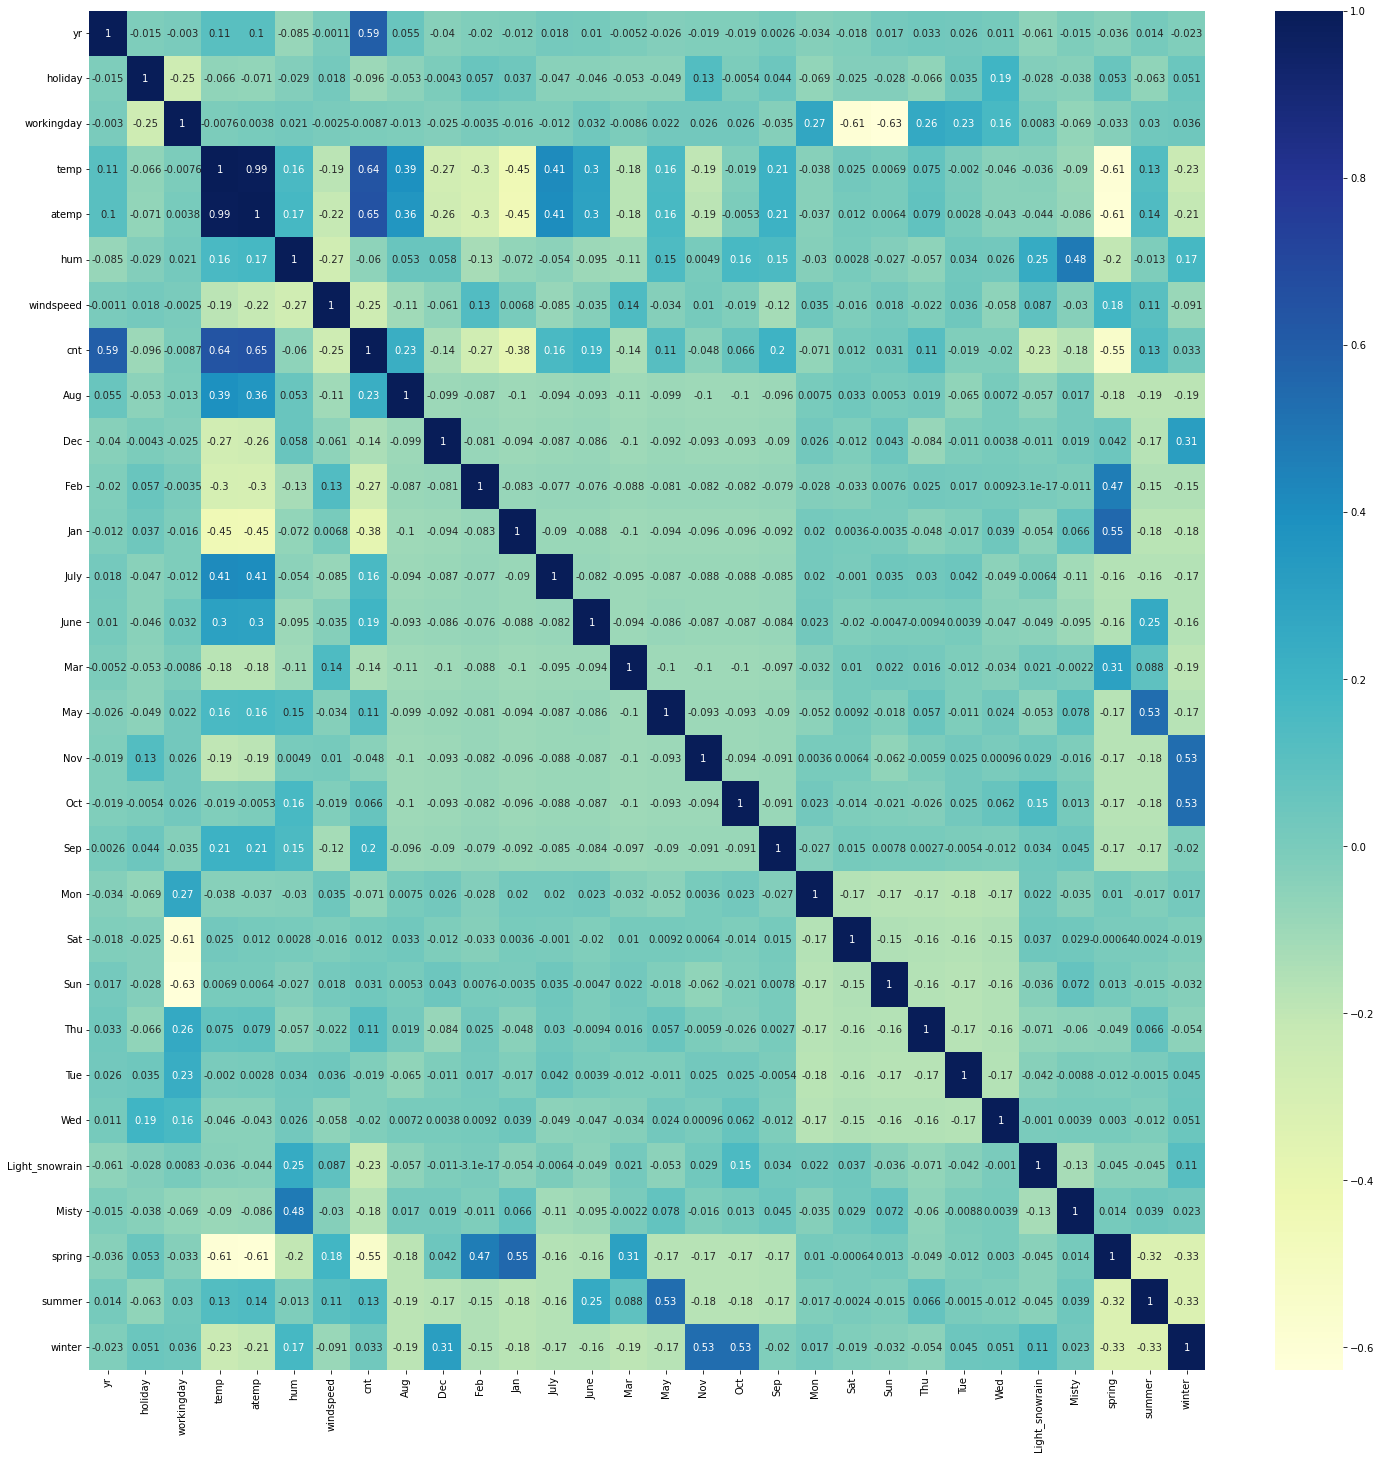

In [737]:
#Creating heatmap to check the correlation between variables
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

cnt seems to have correlation temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

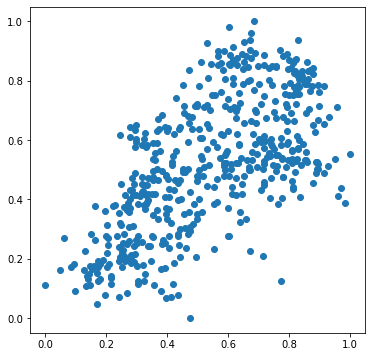

In [738]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

cnt and temp shows positive correlation .

### Dividing into X and Y sets for the model building

In [739]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination

In [740]:
# Create a LinearRegression model
lm = LinearRegression()

# Fit the model to your training data
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select = 15)

# Fit RFE to your training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [741]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [742]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [743]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [744]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## Model 1

In [745]:
X_train_rfe = X_train[col]

In [746]:
X_train_lm_1=sm.add_constant(X_train_rfe)
lr_1=sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.34e-189
Time:                        21:15:30   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

In [747]:
lr_1.params

const             0.320243
yr                0.230328
holiday          -0.091228
temp              0.479977
hum              -0.160227
windspeed        -0.188457
Dec              -0.037199
Jan              -0.043748
July             -0.055495
Nov              -0.040949
Sep               0.074891
Light_snowrain   -0.248116
Misty            -0.055876
spring           -0.061737
summer            0.040767
winter            0.103435
dtype: float64

In [748]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,Misty,2.32
0,yr,2.09
8,Nov,1.83
6,Jan,1.75


 Hum shows high VIF value,hence we can drop this variable.

### Model 2

In [749]:
#Dropping the hum variable
X_train_new=X_train_rfe.drop(['hum'],axis=1)

In [750]:
X_train_lm_2=sm.add_constant(X_train_new)
lr_2=sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.57e-186
Time:                        21:15:30   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

In [751]:
lr_2.params

const             0.246635
yr                0.234287
holiday          -0.091915
temp              0.437655
windspeed        -0.158596
Dec              -0.044529
Jan              -0.050270
July             -0.050376
Nov              -0.041852
Sep               0.068219
Light_snowrain   -0.292892
Misty            -0.081442
spring           -0.071640
summer            0.033271
winter            0.088652
dtype: float64

In [752]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.94
11,spring,2.89
12,summer,2.23
0,yr,2.07
7,Nov,1.80
5,Jan,1.66
6,July,1.59
10,Misty,1.56


Summer has high p-value as compared to others.Hence,summer is dropped. We are not dropping temp even though its VIF is high because we know that temp is a important variable for analysis.

### Model 3

In [753]:
#Dropping the summer variable
X_train_new=X_train_new.drop(['summer'],axis=1)

In [754]:
X_train_lm_3=sm.add_constant(X_train_new)
lr_3=sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.08e-186
Time:                        21:15:30   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2893      0.025     11.

In [755]:
lr_3.params

const             0.289327
yr                0.234795
holiday          -0.091280
temp              0.402583
windspeed        -0.154010
Dec              -0.050984
Jan              -0.055626
July             -0.064343
Nov              -0.048827
Sep               0.053670
Light_snowrain   -0.294885
Misty            -0.081190
spring           -0.103373
winter            0.064977
dtype: float64

In [756]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
12,winter,2.54
11,spring,2.36
0,yr,2.06
7,Nov,1.80
5,Jan,1.65
10,Misty,1.53
4,Dec,1.46
6,July,1.36


### Model 4

In [757]:
#Dropping the nov variable for its p-value
X_train_new=X_train_new.drop(['Nov'],axis=1)

In [758]:
X_train_lm_4=sm.add_constant(X_train_new)
lr_4=sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.02e-186
Time:                        21:15:30   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2769      0.025     11.

In [759]:
lr_4.params

const             0.276909
yr                0.234754
holiday          -0.099395
temp              0.419961
windspeed        -0.154174
Dec              -0.033983
Jan              -0.050552
July             -0.067096
Sep               0.057528
Light_snowrain   -0.290427
Misty            -0.080239
spring           -0.099725
winter            0.048206
dtype: float64

In [760]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
10,spring,2.36
0,yr,2.06
5,Jan,1.64
11,winter,1.64
9,Misty,1.53
6,July,1.36
4,Dec,1.29
7,Sep,1.20


### Model 5

In [761]:
#Dropping the nov variable for its p-value
X_train_new=X_train_new.drop(['Dec'],axis=1)

In [762]:
X_train_lm_5=sm.add_constant(X_train_new)
lr_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.13e-186
Time:                        21:15:30   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2657      0.025     10.

In [763]:
lr_5.params

const             0.265709
yr                0.234848
holiday          -0.097732
temp              0.433461
windspeed        -0.148246
Jan              -0.042689
July             -0.069264
Sep               0.058652
Light_snowrain   -0.287686
Misty            -0.080173
spring           -0.101338
winter            0.043231
dtype: float64

In [764]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
9,spring,2.25
0,yr,2.06
4,Jan,1.60
8,Misty,1.53
10,winter,1.40
5,July,1.36
6,Sep,1.20
7,Light_snowrain,1.08


### Model 6

In [765]:
#Dropping the Jan variable for its p-value
X_train_new=X_train_new.drop(['Jan'],axis=1)

In [766]:
X_train_lm_6=sm.add_constant(X_train_new)
lr_6=sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.16e-186
Time:                        21:15:30   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.024     10.

In [767]:
lr_6.params

const             0.251899
yr                0.234092
holiday          -0.098556
temp              0.451455
windspeed        -0.139817
July             -0.072719
Sep               0.057705
Light_snowrain   -0.286408
Misty            -0.081133
spring           -0.110795
winter            0.047278
dtype: float64

In [768]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
8,spring,1.65
7,Misty,1.51
9,winter,1.40
4,July,1.35
5,Sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual Analysis

### Normality

In [769]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

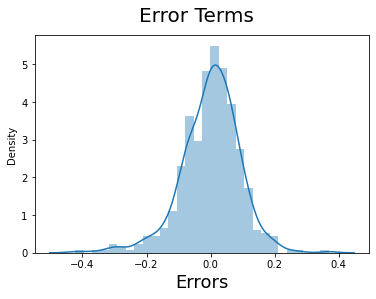

In [770]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)  

 The errors are normally distributed with mean 0

### Multicollinearity

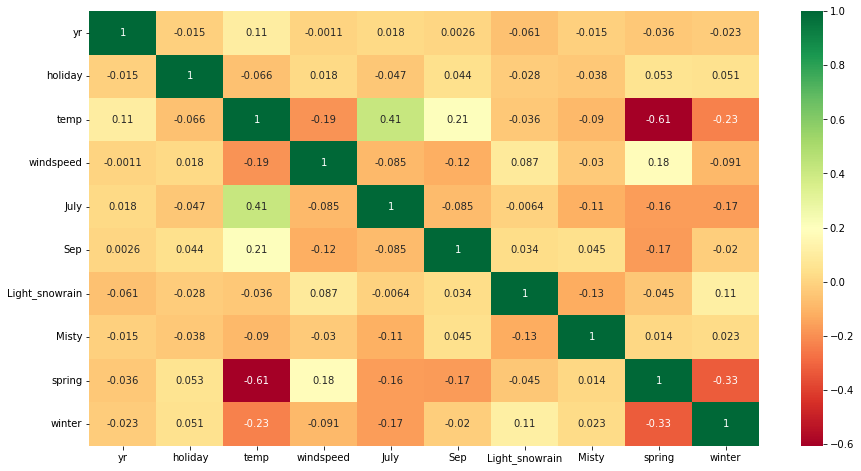

In [771]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Homoscedasticity

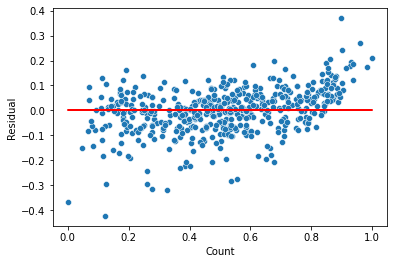

In [772]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [773]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [774]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [775]:
#Splitting into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [778]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,1,0,0,0,0,0,1,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,0,...,1,0,0,0,0,0,0,0,1,0


In [780]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   holiday         219 non-null    int64  
 3   workingday      219 non-null    int64  
 4   temp            219 non-null    float64
 5   atemp           219 non-null    float64
 6   hum             219 non-null    float64
 7   windspeed       219 non-null    float64
 8   Aug             219 non-null    uint8  
 9   Dec             219 non-null    uint8  
 10  Feb             219 non-null    uint8  
 11  Jan             219 non-null    uint8  
 12  July            219 non-null    uint8  
 13  June            219 non-null    uint8  
 14  Mar             219 non-null    uint8  
 15  May             219 non-null    uint8  
 16  Nov             219 non-null    uint8  
 17  Oct             219 non-null    ui

In [789]:
col = X_train_new.columns
X_test = X_test[col]
X_test_lm_6 = sm.add_constant(X_test)

In [790]:
#Predict
y_pred = lr_6.predict(X_test_lm_6)

In [793]:
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.807

### Step 8:Model Evaluation

Text(0, 0.5, 'y_pred')

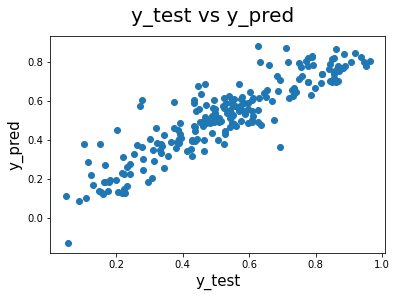

In [700]:
# Plotting y_test and y_pred 
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15) 

In [795]:
x=lr_6.params
round(x,3)

const             0.252
yr                0.234
holiday          -0.099
temp              0.451
windspeed        -0.140
July             -0.073
Sep               0.058
Light_snowrain   -0.286
Misty            -0.081
spring           -0.111
winter            0.047
dtype: float64

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.

The best fiited line : cnt=const*0.252+yr *0.234-holiday*0.099+temp* 0.451-windspeed*0.140-July*0.073+Sep*0.058-Light_snowrain*0.286-Misty*0.081-spring*0.111+winter*0.047